In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

data=pd.read_csv('Hitters.csv')
data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
print("missing values : ",data.isnull().sum())

missing values :  AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


In [6]:
data['Salary']=data['Salary'].fillna(data['Salary'].median())

# categorical colums
label_encoder=LabelEncoder()
data['League']=label_encoder.fit_transform(data['League'])
data['NewLeague']=label_encoder.fit_transform(data['NewLeague'])

In [8]:
x=data[['CRuns']]
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

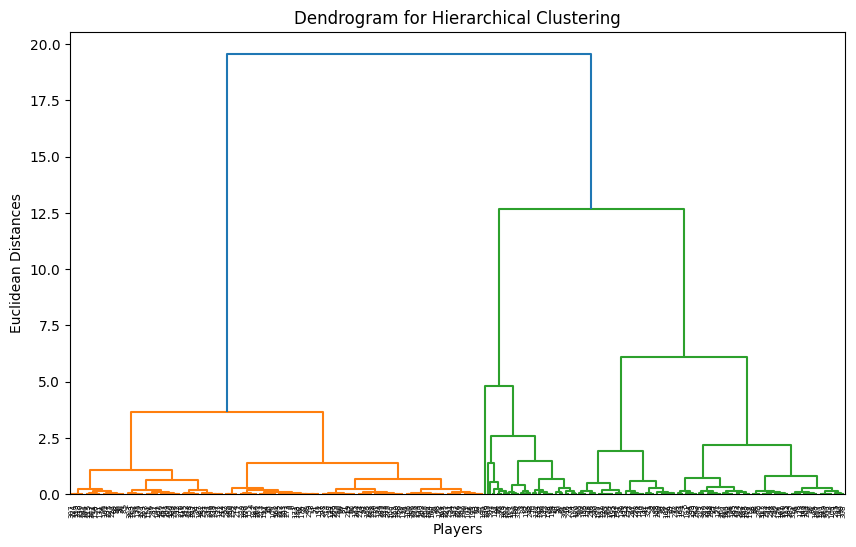

In [11]:
plt.figure(figsize=(10,6))
dendrogram(linkage(x_scaled,method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Players')
plt.ylabel('Euclidean Distances')
plt.show()

In [14]:
# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Cluster'] = hierarchical.fit_predict(x_scaled)

# Display the first few rows with the assigned clusters
print(data[['CRuns', 'Cluster']].head())


   CRuns  Cluster
0     30        1
1    321        0
2    224        1
3    828        2
4     48        1


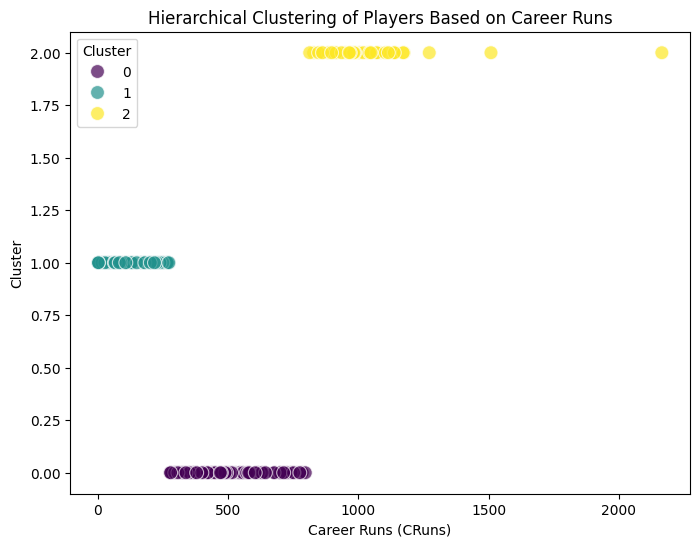

In [15]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['CRuns'], y=data['Cluster'], hue=data['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clustering of Players Based on Career Runs')
plt.xlabel('Career Runs (CRuns)')
plt.ylabel('Cluster')
plt.legend(title='Cluster')
plt.show()